##Installation of the libraries

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Import of libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data recovery via a csv file

In [4]:
df = pd.read_csv('validation_metro.csv',sep=';')

In [5]:
df_info_ligne_13 = pd.read_csv('data_ligne_13.csv')

In [6]:
print(df.head())

         jour  code_stif_trns  code_stif_res  code_stif_arret   libelle_arret  \
0  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
1  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
2  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
3  2024-01-22             100          110.0            692.0  PTE D.VILLETTE   
4  2024-01-22             100          110.0            693.0   PTE MONTREUIL   

     ida               categorie_titre  nb_vald  
0  72064                     Amethyste      292  
1  72064                 Autres titres      337  
2  72064                     Imagine R     1539  
3  72430  Contrat Solidarité Transport     2160  
4  71710  Contrat Solidarité Transport     2277  


In [7]:
print(df_info_ligne_13.head())

   __id                              Geo Point  \
0    30   48.83422588267789, 2.318616414425384   
1   238  48.86002845820203, 2.3139151192031537   
2   355  48.81530753120022, 2.2970777969729843   
3   360    48.87376998959543, 2.31445603617697   
4   362  48.87963476065682, 2.3270222008895027   

                                           Geo Shape  gares_id  \
0  {"coordinates": [2.318616414425384, 48.8342258...       636   
1  {"coordinates": [2.313915119203154, 48.8600284...       362   
2  {"coordinates": [2.297077796972984, 48.8153075...       505   
3  {"coordinates": [2.31445603617697, 48.87376998...       548   
4  {"coordinates": [2.327022200889503, 48.8796347...       467   

                       nom_long nom_so_gar  nom_su_gar  id_ref_ZdC  \
0                       Pernety        NaN         NaN      412687   
1                     Invalides        NaN         NaN       71274   
2  Malakoff - Rue Étienne Dolet        NaN         NaN       70562   
3                    M

In [8]:
df_ligne_13_clean = df_info_ligne_13[['nom_long','id_ref_ZdA','idrefliga']]

In [9]:
print(df_ligne_13_clean.head())

                       nom_long  id_ref_ZdA idrefliga
0                       Pernety       44316    A01546
1                     Invalides       43407    A01546
2  Malakoff - Rue Étienne Dolet       44069    A01546
3                    Miromesnil       43511    A01546
4                         Liège       43814    A01546


In [10]:
print("\nUnique values of df:", df['ida'].unique())
print("Unique values of df_ligne_13_clean:", df_ligne_13_clean['id_ref_ZdA'].unique())


Unique values of df: [ 72064  72430  71710  71989  71084  71889  71006  71045  71663  70636
  71591  70657  73788  71864  71637  71313  71572  71273  71088  73636
  73640  71311  71654  73648  71034  71408  71292  71227  71326  71781
  73690  71420  72326  72285  72358  71860  71366  71216  71370  71647
  71092  71795  73620  71222  71334  71184  71777  71202  72486  71157
  73634  71203  72039  71144  71556  71270  71961  71301  71201  71367
  71001  71284  71170  71091  71117  71920  71315  70375  70248  71320
  71403  71113  71750  71423  71906 412992 999999  72383  72396 426093
  73731  64622 480950 480952  64246  73602  59830  60247  60028  59940
  59734  73844  69487  69852  59836  60915  60072  59577  59678  69554
  72303  63352  71274  71016  71212  60115  71321  71286  70064  72219
  63320  70412  74002  71269  71379  71271  69677  71545  69633  60987
  59842  59882  60785  65305  59531  60536  72126  63454  73721  69625
  70313  62596  59447  62176  62558  60309 422776  6052

In [11]:
df_info_ligne_test = pd.read_csv('emplacement-des-gares-idf.csv',sep=';')

In [12]:
print(df_info_ligne_test.head())

                                Geo Point  \
0  48.729550722662786, 2.3682641286195816   
1     48.8057041548583, 2.169070049430457   
2   48.842005347289565, 2.238887327153073   
3   48.880667463456206, 2.374495966260425   
4  48.892082785966664, 2.2850095013824143   

                                           Geo Shape  gares_id  \
0  {"coordinates": [2.368264128619582, 48.7295507...      1158   
1  {"coordinates": [2.169070049430457, 48.8057041...      1200   
2  {"coordinates": [2.238887327153073, 48.8420053...        99   
3  {"coordinates": [2.374495966260425, 48.8806674...        88   
4  {"coordinates": [2.285009501382414, 48.8920827...        16   

                 nom_long nom_so_gar nom_su_gar  id_ref_ZdC  \
0         Aéroport d'Orly        NaN        NaN       63278   
1    Viroflay Rive Droite        NaN        NaN      422420   
2  Boulogne - Jean Jaurès        NaN        NaN       71147   
3                 Bolivar        NaN        NaN       71920   
4          Anatol

In [13]:
#71 370
df_clean_test = df_info_ligne_test[df_info_ligne_test['idrefliga'] == 'A01546']

In [14]:
print(df_clean_test[df_clean_test['nom_long']=='Saint-Lazare'])

                                Geo Point  \
1115  48.87542071665263, 2.32547637444705   

                                              Geo Shape  gares_id  \
1115  {"coordinates": [2.32547637444705, 48.87542071...       770   

          nom_long nom_so_gar nom_su_gar  id_ref_ZdC            nom_ZdC  \
1115  Saint-Lazare        NaN        NaN       71370  Gare Saint-Lazare   

      id_ref_ZdA       nom_ZdA  ... termetro tertram terval exploitant idf  \
1115      462374  Saint-Lazare  ...        0       0      0       RATP   1   

     principal            x             y  \
1115         1  650526.1561  6.864144e+06   

                                            picto ligne        nom_iv  
1115  https://data.iledefrance-mobilites.fr/api/expl...  Saint-Lazare  

[1 rows x 27 columns]


In [15]:
print(df_clean_test.head())

                                 Geo Point  \
29    48.83422588267789, 2.318616414425384   
237  48.86002845820203, 2.3139151192031537   
258  48.81530753120022, 2.2970777969729843   
263    48.87376998959543, 2.31445603617697   
265  48.87963476065682, 2.3270222008895027   

                                             Geo Shape  gares_id  \
29   {"coordinates": [2.318616414425384, 48.8342258...       636   
237  {"coordinates": [2.313915119203154, 48.8600284...       362   
258  {"coordinates": [2.297077796972984, 48.8153075...       505   
263  {"coordinates": [2.31445603617697, 48.87376998...       548   
265  {"coordinates": [2.327022200889503, 48.8796347...       467   

                         nom_long nom_so_gar nom_su_gar  id_ref_ZdC  \
29                        Pernety        NaN        NaN      412687   
237                     Invalides        NaN        NaN       71274   
258  Malakoff - Rue Étienne Dolet        NaN        NaN       70562   
263                    Miromes

In [16]:
df_ligne_13_clean_test = df_clean_test[['nom_long','id_ref_ZdC','idrefliga']]

In [17]:
print(df_ligne_13_clean_test.head())

                         nom_long  id_ref_ZdC idrefliga
29                        Pernety      412687    A01546
237                     Invalides       71274    A01546
258  Malakoff - Rue Étienne Dolet       70562    A01546
263                    Miromesnil       71346    A01546
265                         Liège       71382    A01546


In [18]:
df_ligne_13_sl = df_ligne_13_clean_test[df_ligne_13_clean_test['id_ref_ZdC']==71370]

In [19]:
df_sl = df[df['libelle_arret'] == 'SAINT-LAZARE']
print(df_sl.head())

            jour  code_stif_trns  code_stif_res  code_stif_arret  \
70    2024-01-22             100          110.0            769.0   
71    2024-01-22             100          110.0            769.0   
72    2024-01-22             100          110.0            769.0   
1013  2024-01-23             100          110.0            769.0   
1014  2024-01-23             100          110.0            769.0   

     libelle_arret    ida               categorie_titre  nb_vald  
70    SAINT-LAZARE  71370                 Autres titres     6922  
71    SAINT-LAZARE  71370  Contrat Solidarité Transport    12476  
72    SAINT-LAZARE  71370                     Imagine R    20854  
1013  SAINT-LAZARE  71370                Forfait Navigo    71937  
1014  SAINT-LAZARE  71370                     Imagine R    21682  


In [20]:
print(df_ligne_13_sl.head())

          nom_long  id_ref_ZdC idrefliga
1115  Saint-Lazare       71370    A01546


In [21]:
## Join of the 2 table validation_metro et emplacement-des-gares-idf

In [22]:
df = pd.read_csv('validation_metro.csv',sep=';')
df_inner = pd.merge( df,df_ligne_13_clean_test, right_on='id_ref_ZdC',left_on='ida', how='inner')

In [23]:
print(df_inner)

             jour  code_stif_trns  code_stif_res  code_stif_arret  \
0      2024-01-22             100          110.0            700.0   
1      2024-01-22             100          110.0            761.0   
2      2024-01-22             100          110.0            762.0   
3      2024-01-22             100          110.0            763.0   
4      2024-01-22             100          110.0            763.0   
...           ...             ...            ...              ...   
46594  2024-03-11             100          110.0            769.0   
46595  2024-03-11             800          803.0            361.0   
46596  2024-03-11             800          803.0            361.0   
46597  2024-03-11             800          803.0            688.0   
46598  2024-03-11             800          803.0            688.0   

         libelle_arret    ida categorie_titre  nb_vald  \
0       PORTE D.VANVES  71006      NON DEFINI      333   
1       ST-DENIS-BASIL  72326       Imagine R     2029 

In [24]:
df_m13 = df_inner[['jour','libelle_arret','nb_vald']]
print(df_m13)

             jour    libelle_arret  nb_vald
0      2024-01-22   PORTE D.VANVES      333
1      2024-01-22   ST-DENIS-BASIL     2029
2      2024-01-22   ST-DENIS-PTE P     5262
3      2024-01-22   ST-DENIS-UNIV.      285
4      2024-01-22   ST-DENIS-UNIV.     5531
...           ...              ...      ...
46594  2024-03-11     SAINT-LAZARE     1598
46595  2024-03-11        INVALIDES       17
46596  2024-03-11        INVALIDES       56
46597  2024-03-11  PORTE-DE-CLICHY     2584
46598  2024-03-11  PORTE-DE-CLICHY       73

[46599 rows x 3 columns]


In [25]:
df_m13_2024_01_22 = df_m13[df_m13['jour'] == '2024-01-22']
print(df_m13_2024_01_22)

             jour    libelle_arret  nb_vald
0      2024-01-22   PORTE D.VANVES      333
1      2024-01-22   ST-DENIS-BASIL     2029
2      2024-01-22   ST-DENIS-PTE P     5262
3      2024-01-22   ST-DENIS-UNIV.      285
4      2024-01-22   ST-DENIS-UNIV.     5531
...           ...              ...      ...
41409  2024-01-22        INVALIDES       18
41410  2024-01-22  PORTE-DE-CLICHY      523
41411  2024-01-22  PORTE-DE-CLICHY     2632
41412  2024-01-22  PORTE-DE-CLICHY      102
41413  2024-01-22     SAINT-LAZARE    19288

[259 rows x 3 columns]


## Data visalization of the number of validation on line 13 and on the date  22nd of January 2024

In [26]:
df_m13_2024_01_22_groupby = df_m13_2024_01_22.groupby('libelle_arret')['nb_vald'].sum().reset_index(name='somme_valeurs')
print(df_m13_2024_01_22_groupby)

             libelle_arret  somme_valeurs
0                 BROCHANT           5105
1            CARREF.PLEYEL           7584
2           CHAMPS-ELYSEES           7141
3           CHATILLON-MON.          21300
4                    DUROC          10950
5             GABRIEL PERI          13965
6                    GAITE           8091
7                GARIBALDI           6531
8               GUY MOQUET          11038
9   HAUSSMANN-SAINT-LAZARE          25422
10               INVALIDES           9718
11              LA FOURCHE           6734
12            LES AGNETTES           7419
13          LES COURTILLES          11539
14                   LIEGE           5080
15           MAIRIE CLICHY          14193
16          MAIRIE ST-OUEN          21229
17          MALAK-P.VANVES           9884
18          MALAK.ET.DOLET           6139
19              MIROMESNIL          19633
20                 PERNETY           8213
21            PLACE CLICHY          19787
22               PLAISANCE        

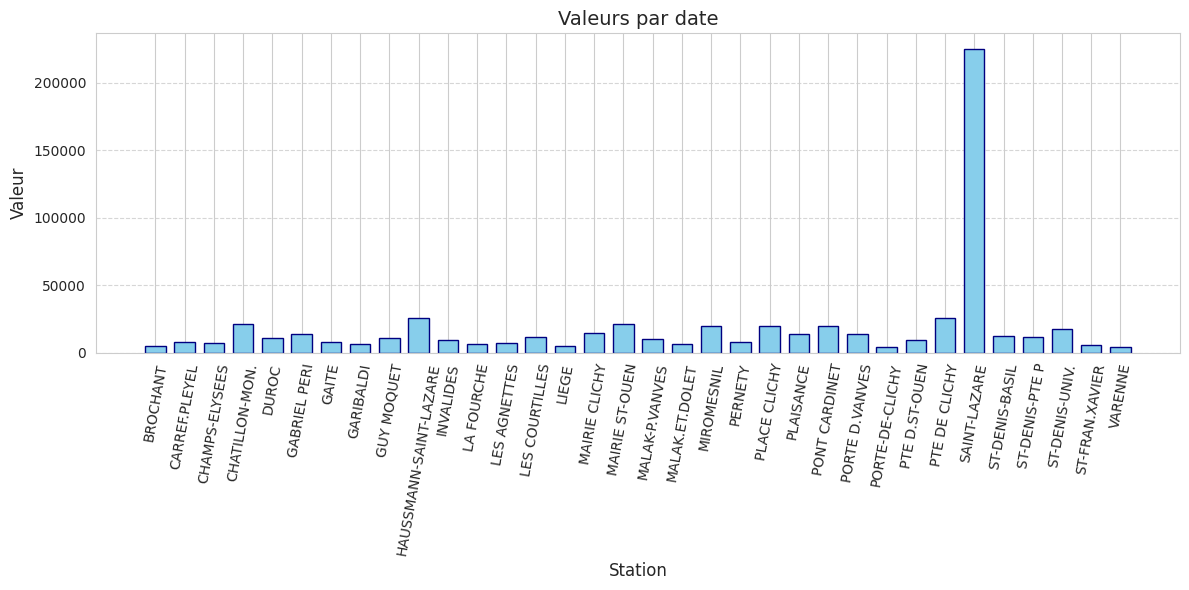

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
plt.bar(df_m13_2024_01_22_groupby['libelle_arret'], df_m13_2024_01_22_groupby['somme_valeurs'], width=0.7, color='skyblue', edgecolor='navy')

# Personnaliser le graphique
plt.title('Valeurs par date', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Station', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=80)

# Ajuster automatiquement la mise en page
plt.tight_layout()


In [28]:
df_referetiel_des_ligne = pd.read_csv('referentiel-des-lignes.csv',sep=';')
print(df_referetiel_des_ligne)

   ID_Line Name_Line ShortName_Line TransportMode  TransportSubmode  Type  \
0   C01373         3              3         metro               NaN   NaN   
1   C01377         7              7         metro               NaN   NaN   
2   C01379         9              9         metro               NaN   NaN   
3   C01384        14             14         metro               NaN   NaN   
4   C01376         6              6         metro               NaN   NaN   
5   C01380        10             10         metro               NaN   NaN   
6   C01387        7B             7B         metro               NaN   NaN   
7   C01372         2              2         metro               NaN   NaN   
8   C01374         4              4         metro               NaN   NaN   
9   C01378         8              8         metro               NaN   NaN   
10  C01381        11             11         metro               NaN   NaN   
11  C01383        13             13         metro               NaN   NaN   

In [29]:
df_name_line_Id_group_line=df_referetiel_des_ligne[['Name_Line','ID_GroupOfLines']]
print(df_name_line_Id_group_line)

   Name_Line ID_GroupOfLines
0          3          A01536
1          7          A01540
2          9          A01542
3         14          A01547
4          6          A01539
5         10          A01543
6         7B          A01550
7          2          A01535
8          4          A01537
9          8          A01541
10        11          A01544
11        13          A01546
12         1          A01534
13        12          A01545
14        3B          A01549
15         5          A01538


In [30]:
df_clean_test_all_lines = pd.merge( df_info_ligne_test,df_name_line_Id_group_line, right_on='ID_GroupOfLines',left_on='idrefliga', how='inner')

In [31]:
print(df_clean_test_all_lines.head())

                                Geo Point  \
0   48.842005347289565, 2.238887327153073   
1   48.880667463456206, 2.374495966260425   
2  48.892082785966664, 2.2850095013824143   
3    48.86558647849898, 2.356736756794993   
4   48.88380394240113, 2.3506129993253224   

                                           Geo Shape  gares_id  \
0  {"coordinates": [2.238887327153073, 48.8420053...        99   
1  {"coordinates": [2.374495966260425, 48.8806674...        88   
2  {"coordinates": [2.285009501382414, 48.8920827...        16   
3  {"coordinates": [2.356736756794993, 48.8655864...        28   
4  {"coordinates": [2.350612999325322, 48.8838039...        49   

                 nom_long nom_so_gar nom_su_gar  id_ref_ZdC  \
0  Boulogne - Jean Jaurès        NaN        NaN       71147   
1                 Bolivar        NaN        NaN       71920   
2          Anatole France        NaN        NaN       71519   
3         Arts et Métiers        NaN        NaN       71293   
4     Barbès-Roch

In [32]:
df = pd.read_csv('validation_metro.csv',sep=';')
df_inner2 = pd.merge( df,df_clean_test_all_lines, right_on='id_ref_ZdC',left_on='ida', how='inner')
max_date=df_inner2['jour'].max()
min_date=df_inner2['jour'].min() 
print(max_date)
print(min_date)

2024-06-30
2024-01-01


## Creation on the data data viz but you can choose the line and the date 

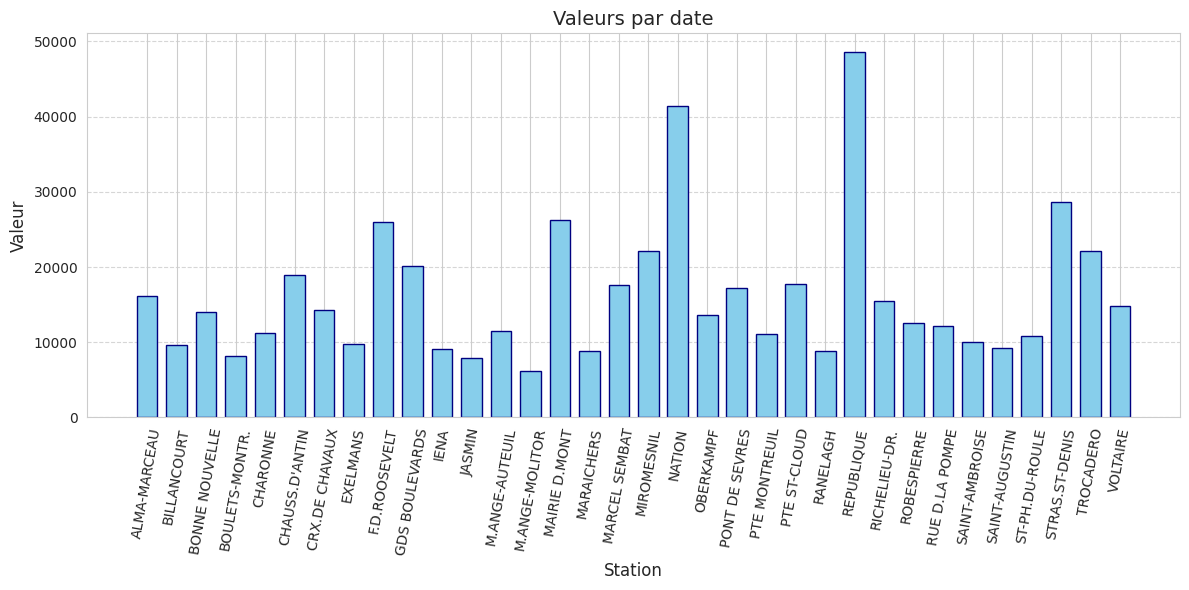

In [33]:
line = "9"
date = "2024-05-30"


df_line_chosen = df_inner2[df_inner2['Name_Line']==line]
df_line_chosen_clean = df_line_chosen[['jour','libelle_arret','nb_vald']]

df_line_date_chosen = df_line_chosen_clean[df_line_chosen_clean['jour'] == date]
df_groupby = df_line_date_chosen.groupby('libelle_arret')['nb_vald'].sum().reset_index(name='somme_valeurs')


sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
plt.bar(df_groupby['libelle_arret'], df_groupby['somme_valeurs'], width=0.7, color='skyblue', edgecolor='navy')

# Personnaliser le graphique
plt.title('Valeurs par date', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Station', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=80)

# Ajuster automatiquement la mise en page
plt.tight_layout()


## add the details about type of pass

In [34]:
pd.options.mode.copy_on_write = True
line = "9"
date = "2024-05-30"


df_line_chosen = df_inner2[df_inner2['Name_Line']==line]
df_line_chosen_clean = df_line_chosen[['jour','libelle_arret','categorie_titre','nb_vald']]


df_line_chosen_clean['jour'] = pd.to_datetime(df_line_chosen_clean['jour'])
df_line_date_chosen = df_line_chosen_clean[df_line_chosen_clean['jour'] == date]
df_test_sum2 = df_line_date_chosen.groupby(['jour','libelle_arret','categorie_titre'])['nb_vald'].sum().reset_index(name='somme_valeurs')
# Filter between two dates (example: May 1st to May 15th)
#start_date = '2024-05-01'
#end_date = '2024-05-02'
#df_filtered2 = df_test_sum2[(df_test_sum2['jour'] >= start_date) & (df_test_sum2['jour'] <= end_date)]
#df_filtered2 = df_filtered2[df_filtered2['jour'].dt.weekday < 5]
#print( df_filtered2)

pivot2 = df_test_sum2.pivot_table(index=['jour','libelle_arret'], columns='categorie_titre', values='somme_valeurs', aggfunc='sum')
print(pivot2)

#df_groupby = df_line_date_chosen.groupby('libelle_arret')['nb_vald'].sum().reset_index(name='somme_valeurs')





categorie_titre            Amethyste  Autres titres  \
jour       libelle_arret                              
2024-05-30 ALMA-MARCEAU          203           3294   
           BILLANCOURT           132           1391   
           BONNE NOUVELLE        227           2463   
           BOULETS-MONTR.        251            916   
           CHARONNE              320           1531   
           CHAUSS.D'ANTIN        318           3669   
           CRX.DE CHAVAUX        449           1868   
           EXELMANS              183           1671   
           F.D.ROOSEVELT         312           4889   
           GDS BOULEVARDS        259           3645   
           IENA                  112           2074   
           JASMIN                137           1313   
           M.ANGE-AUTEUIL        178           2623   
           M.ANGE-MOLITOR        108           1205   
           MAIRIE D.MONT         523           2703   
           MARAICHERS            363            897   
          

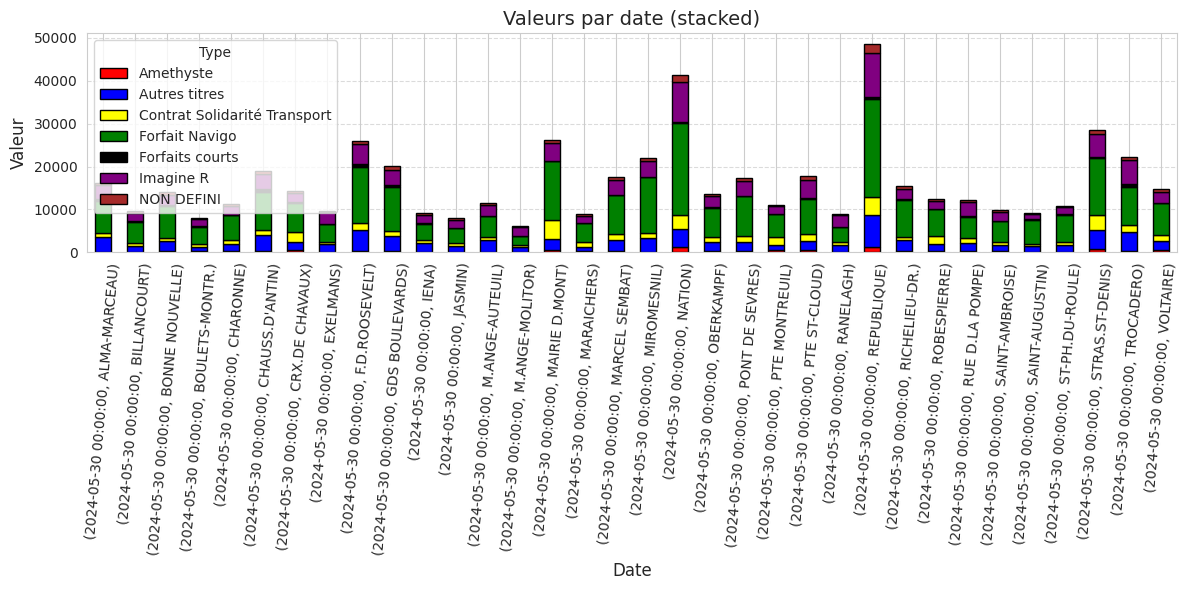

In [35]:
# Plot
sns.set_style("whitegrid")
pivot2.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['red','blue','yellow','green','black','purple','brown'],  # adapt if you have more categories
    edgecolor='black'
)

plt.title('Valeurs par date (stacked)', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=85)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Type')  # or whatever your stacking variable is
plt.show()

In [36]:
pd.options.mode.copy_on_write = True
line = "9"
date = "2024-05-30"


df_line_chosen = df_inner2[df_inner2['Name_Line']==line]
df_line_chosen_clean = df_line_chosen[['jour','libelle_arret','categorie_titre','nb_vald']]


df_line_chosen_clean['jour'] = pd.to_datetime(df_line_chosen_clean['jour'])
df_line_date_chosen = df_line_chosen_clean[df_line_chosen_clean['jour'] == date]
df_test_sum2 = df_line_date_chosen.groupby(['libelle_arret','categorie_titre'])['nb_vald'].sum().reset_index(name='somme_valeurs')
# Filter between two dates (example: May 1st to May 15th)
#start_date = '2024-05-01'
#end_date = '2024-05-02'
#df_filtered2 = df_test_sum2[(df_test_sum2['jour'] >= start_date) & (df_test_sum2['jour'] <= end_date)]
#df_filtered2 = df_filtered2[df_filtered2['jour'].dt.weekday < 5]
#print( df_filtered2)

pivot2 = df_test_sum2.pivot_table(index=['libelle_arret'], columns='categorie_titre', values='somme_valeurs', aggfunc='sum')
print(pivot2)

#df_groupby = df_line_date_chosen.groupby('libelle_arret')['nb_vald'].sum().reset_index(name='somme_valeurs')

categorie_titre  Amethyste  Autres titres  Contrat Solidarité Transport  \
libelle_arret                                                             
ALMA-MARCEAU           203           3294                          1090   
BILLANCOURT            132           1391                           744   
BONNE NOUVELLE         227           2463                           707   
BOULETS-MONTR.         251            916                           767   
CHARONNE               320           1531                           966   
CHAUSS.D'ANTIN         318           3669                          1174   
CRX.DE CHAVAUX         449           1868                          2388   
EXELMANS               183           1671                           634   
F.D.ROOSEVELT          312           4889                          1591   
GDS BOULEVARDS         259           3645                           971   
IENA                   112           2074                           614   
JASMIN                 13

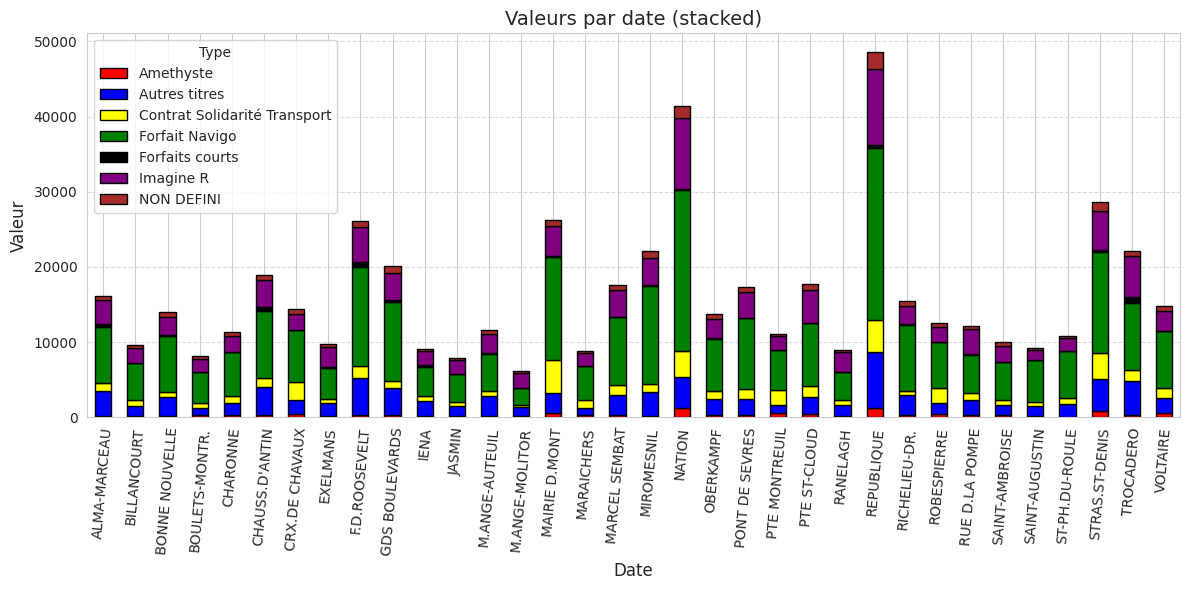

In [37]:
# Plot
sns.set_style("whitegrid")
pivot2.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['red','blue','yellow','green','black','purple','brown'],  # adapt if you have more categories
    edgecolor='black'
)

plt.title('Valeurs par date (stacked)', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=85)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Type')  # or whatever your stacking variable is
plt.show()


In [41]:
pd.options.mode.copy_on_write = True
line = "9"
#date = "2024-05-30"
start_date = '2024-05-01'
end_date = '2024-06-01'

df_line_chosen = df_inner2[df_inner2['Name_Line']==line]
df_line_chosen_clean = df_line_chosen[['jour','libelle_arret','categorie_titre','nb_vald']]
# Filter between two dates (example: May 1st to May 15th)

#df_filtered2 = df_test_sum2[(df_test_sum2['jour'] >= start_date) & (df_test_sum2['jour'] <= end_date)]
#df_filtered2 = df_filtered2[df_filtered2['jour'].dt.weekday < 5]
#print( df_filtered2)

df_line_chosen_clean['jour'] = pd.to_datetime(df_line_chosen_clean['jour'])
#df_line_date_chosen = df_line_chosen_clean[df_line_chosen_clean['jour'] == date]
df_line_date_chosen = df_line_chosen_clean[(df_line_chosen_clean['jour'] >= start_date) & (df_line_chosen_clean['jour'] <= end_date) & (df_line_chosen_clean['jour'].dt.weekday < 5)]


df_test_sum2 = df_line_date_chosen.groupby(['libelle_arret','categorie_titre'])['nb_vald'].sum().reset_index(name='somme_valeurs')


pivot2 = df_test_sum2.pivot_table(index=['libelle_arret'], columns='categorie_titre', values='somme_valeurs', aggfunc='sum')
print(pivot2)

#df_groupby = df_line_date_chosen.groupby('libelle_arret')['nb_vald'].sum().reset_index(name='somme_valeurs')

categorie_titre  Amethyste  Autres titres  Contrat Solidarité Transport  \
libelle_arret                                                             
ALMA-MARCEAU          4183          59588                         22602   
BILLANCOURT           2597          24967                         15520   
BONNE NOUVELLE        5223          41878                         15122   
BOULETS-MONTR.        5052          18084                         16199   
CHARONNE              6517          27532                         20336   
CHAUSS.D'ANTIN        6528          67728                         24514   
CRX.DE CHAVAUX       10126          35773                         53143   
EXELMANS              3027          22604                         11563   
F.D.ROOSEVELT         5477          76451                         31976   
GDS BOULEVARDS        5293          61043                         19908   
IENA                  2374          32381                         12351   
JASMIN                290

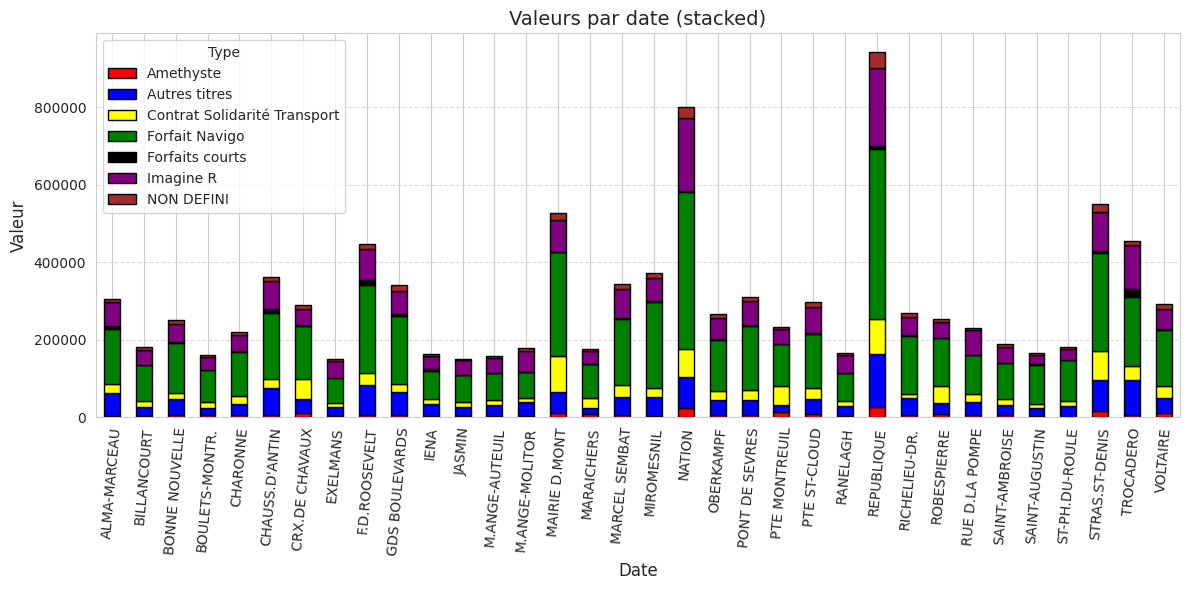

In [42]:
# Plot
sns.set_style("whitegrid")
pivot2.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['red','blue','yellow','green','black','purple','brown'],  # adapt if you have more categories
    edgecolor='black'
)

plt.title('Valeurs par date (stacked)', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=85)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Type')  # or whatever your stacking variable is
plt.show()